In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from cma_es.cma_es_numpy import CMA
from envs.low_d_problems import batch_rosenbrock, batch_himmelblau, batch_hump_camel

# Numpy Version - Rosenbrock, Himmelblau, 6-Hump-Camel

In [2]:
optimizer = CMA(mean=np.zeros(5), seed=0, sigma=1.3, population_size=15)
fitness_log = []
a, b = 1, 100
for generation in range(200):
    # Ask - Eval - Tell - Log
    x = optimizer.ask()
    value = batch_rosenbrock(x, a, b)
    optimizer.tell(x, value)
    fitness_log.append([np.min(value), np.mean(value), np.std(value), optimizer.sigma])
    if (generation + 1) % 20 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                   value[0], x[0]))

# Gen: 20|Fitness: 5.55|Params: [-0.52301133  0.2697065   0.02563592 -0.04966459 -0.03895471]
# Gen: 40|Fitness: 4.52|Params: [ 0.00779796 -0.05702847  0.03107529  0.03781438  0.01392822]
# Gen: 60|Fitness: 9.08|Params: [ 0.71984646  0.26781105  0.02396982  0.00155573 -0.01333405]
# Gen: 80|Fitness: 1.92|Params: [0.81128344 0.59488468 0.36849291 0.17289944 0.05822064]
# Gen: 100|Fitness: 1.33|Params: [0.84514876 0.72723931 0.56631203 0.37019472 0.08741764]
# Gen: 120|Fitness: 0.10|Params: [0.97415019 0.9394419  0.88254378 0.76874243 0.58211063]
# Gen: 140|Fitness: 0.00|Params: [0.99838007 1.0006427  1.00029033 1.00056711 1.00202188]
# Gen: 160|Fitness: 0.00|Params: [1.00002205 1.00012973 1.00026142 1.00074667 1.00145094]
# Gen: 180|Fitness: 0.00|Params: [0.99999769 0.99999544 0.99999818 0.99999386 0.99998651]
# Gen: 200|Fitness: 0.00|Params: [1.00000027 1.00000036 1.00000069 1.00000165 1.00000351]


(<Figure size 360x216 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8d7732908>,
       dtype=object))

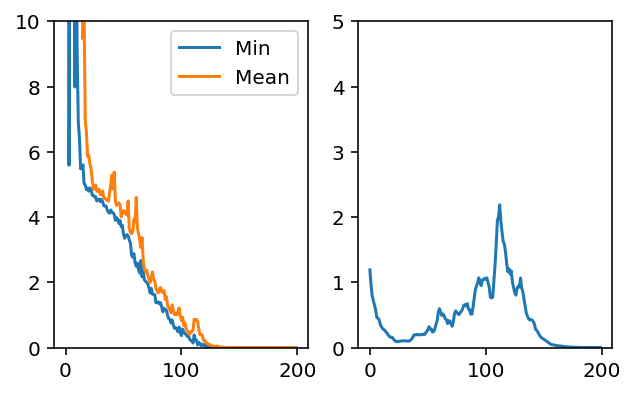

In [3]:
def plot_fitness(fitness_log, ylims=(0, 10)):
    fig, ax = plt.subplots(1, 2, figsize=(5, 3))
    fitness_log = np.array(fitness_log)
    
    ax[0].plot(fitness_log[:, 0], label="Min")
    ax[0].plot(fitness_log[:, 1], label="Mean")
    ax[0].set_ylim(ylims)
    ax[0].legend()
    
    ax[1].plot(fitness_log[:, -1])
    ax[1].set_ylim([0, 5])
    return fig, ax

plot_fitness(fitness_log)

In [4]:
optimizer = CMA(mean=np.zeros(2), seed=0, sigma=1.3, population_size=6)
fitness_log = []
for generation in range(50):
    # Ask - Eval - Tell - Log
    x = optimizer.ask()
    value = batch_himmelblau(x, 0)
    optimizer.tell(x, value)
    fitness_log.append([np.min(value), np.mean(value), np.std(value)])
    if (generation + 1) % 20 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                   value[0], x[0]))

# Gen: 20|Fitness: 3.22|Params: [-3.08267222 -0.20156283]
# Gen: 40|Fitness: 0.01|Params: [-3.18088404  0.84872707]


In [5]:
optimizer = CMA(mean=np.zeros(2), seed=0, sigma=1.3, population_size=6)
fitness_log = []
for generation in range(50):
    # Ask - Eval - Tell - Log
    x = optimizer.ask()
    value = batch_hump_camel(x, 0)
    optimizer.tell(x, value)
    fitness_log.append([np.min(value), np.mean(value), np.std(value)])
    if (generation + 1) % 20 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                   value[0], x[0]))

# Gen: 20|Fitness: -0.84|Params: [0.11440692 0.63212221]
# Gen: 40|Fitness: -1.03|Params: [-0.09611574  0.71983536]


# Test Recovery from non-stationary function change

In [6]:
optimizer = CMA(mean=np.zeros(5), seed=0, sigma=1.3, population_size=15)
fitness_log = []
a, b = 1, 100
for generation in range(1000):
    # Ask - Eval - Tell - Log
    x = optimizer.ask()
    value = batch_rosenbrock(x, a, b)
    optimizer.tell(x, value)
    fitness_log.append([np.min(value), np.mean(value), np.std(value)])
    if (generation + 1) % 50 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                   value[0], x[0]))
    if (generation + 1) % 100 == 0:
        a += 1
        print("Nonstationary Change", a)

# Gen: 50|Fitness: 5.32|Params: [ 0.36314667  0.00498391 -0.01316267  0.01704236  0.05262139]
# Gen: 100|Fitness: 1.33|Params: [0.84514876 0.72723931 0.56631203 0.37019472 0.08741764]
Nonstationary Change 2
# Gen: 150|Fitness: 2.72|Params: [1.09481171 1.16841482 1.34240741 1.72868677 2.97356747]
# Gen: 200|Fitness: 1.70|Params: [1.11336828 1.23598957 1.52414403 2.32189628 5.39195456]
Nonstationary Change 3
# Gen: 250|Fitness: 7.60|Params: [ 1.17107351  1.35367077  1.81868568  3.30111688 10.89048605]
# Gen: 300|Fitness: 7.52|Params: [ 1.17542092  1.37454809  1.88017718  3.52967116 12.45854449]
Nonstationary Change 4
# Gen: 350|Fitness: 18.16|Params: [ 1.2199837   1.46712203  2.11750414  4.47570262 20.05945093]
# Gen: 400|Fitness: 17.97|Params: [ 1.22016911  1.47757726  2.17096243  4.70607021 22.14694905]
Nonstationary Change 5
# Gen: 450|Fitness: 33.46|Params: [ 1.25389078  1.54021659  2.35003992  5.51287955 30.3847693 ]
# Gen: 500|Fitness: 33.28|Params: [ 1.25563297  1.56140919  2.4219

(<Figure size 360x216 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8dba82198>,
       dtype=object))

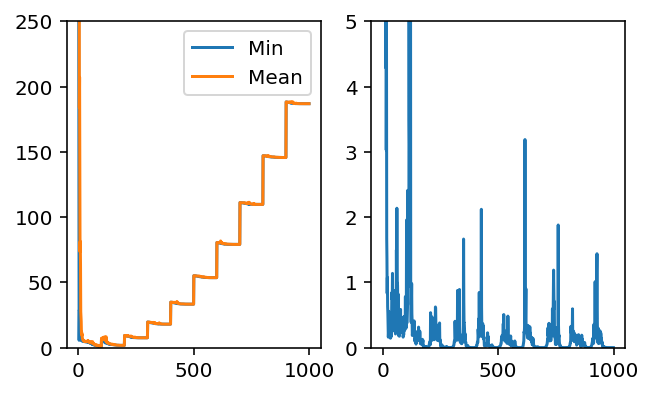

In [7]:
plot_fitness(fitness_log, ylims=(0, 250))

# Jax-Version + Numpy Sanity Check

In [8]:
import jax
import jax.numpy as jnp
from cma_es.cma_es_jax import (init_cma_es, ask_cma_es, tell_cma_es,
                               init_evo_logger, update_evo_logger)

In [9]:
rng = jax.random.PRNGKey(0)
mean_init, sigma_init = jnp.zeros(2), 1.3
pop_size, elite_size = 6, 3
params, memory = init_cma_es(mean_init, sigma_init,
                             pop_size, elite_size)

# Fix population size, fix elite size
rng, rng_input = jax.random.split(rng)
x, memory = ask_cma_es(rng_input, memory, params)
value = batch_rosenbrock(x, a, b)
memory = tell_cma_es(x, value, elite_size, params, memory)
memory["mean"]

DeviceArray([-0.0132519,  0.4397723], dtype=float32)

In [10]:
optimizer = CMA(mean=np.zeros(2), seed=0, sigma=1.3, population_size=6, elite_size=3)
_ = optimizer.ask()
optimizer.tell(x, value)
optimizer.mean

array([-0.01325189,  0.43977229])

### Run full Rosenbrock Example with JIT

In [11]:
a, b = 1, 100
num_params = 2
mean_init, sigma_init = jnp.zeros(num_params), 1.3
params, memory = init_cma_es(mean_init, sigma_init, pop_size, elite_size)

top_k = 3

evo_logger = init_evo_logger(top_k, num_params)

for generation in range(200):
    # Ask - Eval - Tell - Log
    rng, rng_input = jax.random.split(rng)
    x, memory = ask_cma_es(rng_input, memory, params)
    value = batch_rosenbrock(x, a, b)
    memory = tell_cma_es(x, value, elite_size, params, memory)
    evo_logger = update_evo_logger(evo_logger, x, value, memory, top_k)
    if (generation + 1) % 20 == 0:
        print("# Gen: {}|Fitness: {:.2f}|Params: {}".format(generation+1,
                                                  evo_logger["top_values"][0],
                                                  evo_logger["top_params"][0]))

# Gen: 20|Fitness: 0.01|Params: [0.95577323 0.9073902 ]
# Gen: 40|Fitness: 0.00|Params: [0.9944336  0.99037564]
# Gen: 60|Fitness: 0.00|Params: [1.0001984 1.0003332]
# Gen: 80|Fitness: 0.00|Params: [1.0000037 1.0000088]
# Gen: 100|Fitness: 0.00|Params: [1.0000002 1.0000005]
# Gen: 120|Fitness: 0.00|Params: [1. 1.]
# Gen: 140|Fitness: 0.00|Params: [1. 1.]
# Gen: 160|Fitness: 0.00|Params: [1. 1.]
# Gen: 180|Fitness: 0.00|Params: [1. 1.]
# Gen: 200|Fitness: 0.00|Params: [1. 1.]


# Schematic Plot of Contour Distribution Updates

In [79]:
from matplotlib.colors import LinearSegmentedColormap
from pylab import rcParams
from scipy import stats

objective = batch_himmelblau
contour_function = himmelblau_contour
global_minimums = [(3.0, 2.0),
                   (-2.805118, 3.131312),
                   (-3.779310, -3.283186),
                   (3.584428, -1.848126),]
x1_lower_bound, x1_upper_bound = -4, 4
x2_lower_bound, x2_upper_bound = -4, 4


def himmelblau_contour(x):
    return np.log(himmelblau_fct(x) + 1)

def himmelblau_fct(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [98]:
rng = jax.random.PRNGKey(1)

sigma = (x1_upper_bound - x2_lower_bound) / 5
es_params, es_memory = init_cma_es(jnp.zeros(2), sigma,
                                   population_size=4, mu=2)
evo_logger = init_evo_logger(4, 2)

In [99]:
def gen_base_plot():
    rcParams["figure.figsize"] = 5, 5
    fig1, ax1 = plt.subplots(1, 1)
    fig2, ax2 = plt.subplots(1, 1)

    color_dict = {
        "red": ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
        "green": ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
        "blue": ((0.0, 1.0, 1.0), (1.0, 1.0, 1.0)),
        "yellow": ((1.0, 1.0, 1.0), (1.0, 1.0, 1.0)),
    }
    bw = LinearSegmentedColormap("BlueWhile", color_dict)


    ax1.set_xlim(x1_lower_bound, x1_upper_bound)
    ax1.set_ylim(x2_lower_bound, x2_upper_bound)
    ax2.set_xlim(x1_lower_bound, x1_upper_bound)
    ax2.set_ylim(x2_lower_bound, x2_upper_bound)
    ax1.axis("off")
    ax2.axis("off")

    # Plot 4 local minimum value
    for m in global_minimums:
        ax1.plot(m[0], m[1], "y*", ms=10)
        ax2.plot(m[0], m[1], "y*", ms=10)

    # Plot contour of himmelbleu function
    x1 = np.arange(x1_lower_bound, x1_upper_bound, 0.01)
    x2 = np.arange(x2_lower_bound, x2_upper_bound, 0.01)
    x1, x2 = np.meshgrid(x1, x2)
    x = np.stack([x1, x2])
    ax1.contour(x1, x2, contour_function(x), 30, cmap=bw)
    fig1.tight_layout()
    fig2.tight_layout()
    return fig1, ax1, fig2, ax2

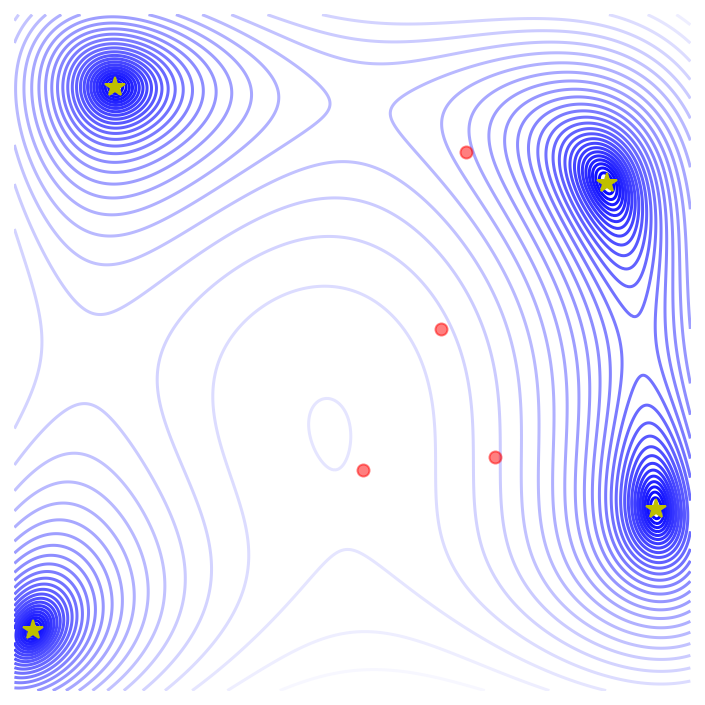

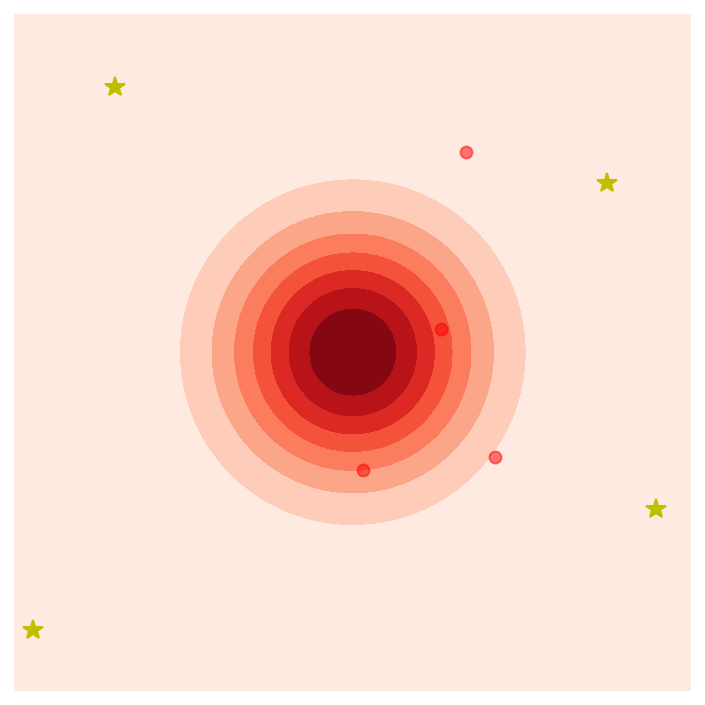

In [100]:
fig1, ax1, fig2, ax2 = gen_base_plot()

rng, rng_input = jax.random.split(rng)
x, es_memory = ask_cma_es(rng_input, es_memory, es_params)

for i in range(4):
    # Plot sample points
    ax1.plot(x[i, 0], x[i, 1], "o", c="r", alpha=0.5)
    ax2.plot(x[i, 0], x[i, 1], "o", c="r", alpha=0.5)

# Plot multivariate gaussian distribution of CMA-ES
xt, yt = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv = stats.multivariate_normal(np.array(es_memory["mean"]),
                               np.array(es_memory["C"]))
pos = np.dstack((xt, yt))
ax2.contourf(xt, yt, rv.pdf(pos), cmap="Reds")

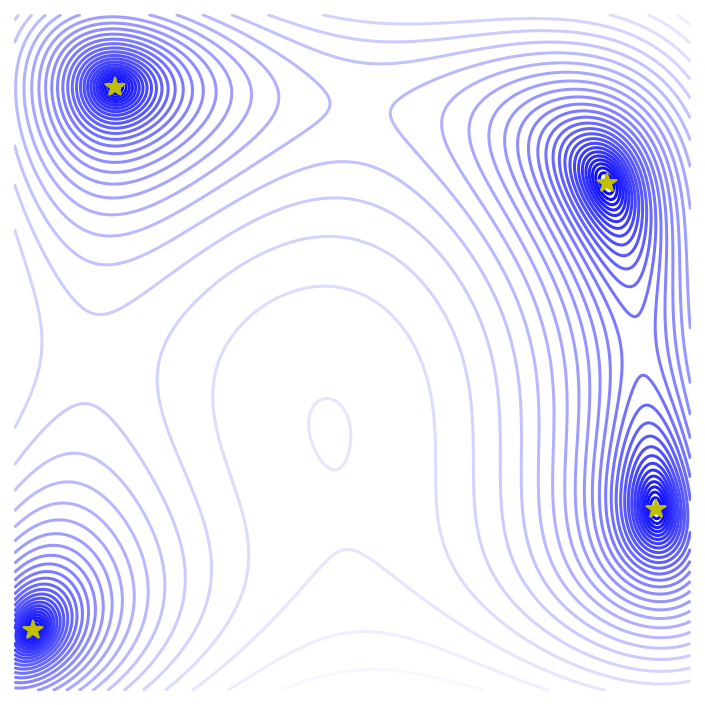

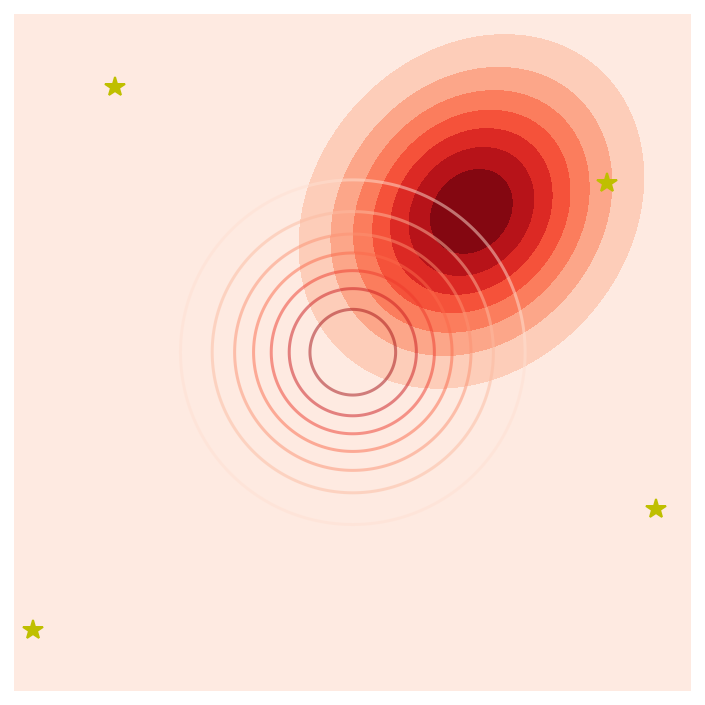

In [101]:
fig1, ax1, fig2, ax2 = gen_base_plot()

# Plot multivariate gaussian distribution of CMA-ES
xt, yt = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv1 = stats.multivariate_normal(np.array(np.zeros(2)),
                               np.array(np.eye(2)))
pos = np.dstack((xt, yt))
c1 = ax2.contour(xt, yt, rv1.pdf(pos), cmap="Reds", alpha=0.5)

value = objective(x, 0)
es_memory = tell_cma_es(x, value, 2, es_params, es_memory)

# Plot multivariate gaussian distribution of CMA-ES
x, y = np.mgrid[x1_lower_bound:x1_upper_bound:0.01,
                x2_lower_bound:x2_upper_bound:0.01]
rv2 = stats.multivariate_normal(np.array(es_memory["mean"]),
                               np.array(es_memory["C"]))
pos = np.dstack((x, y))
c2 = ax2.contourf(x, y, rv2.pdf(pos), cmap="Reds")